In [13]:
#load necessary data
import sys
import scipy.io
import pandas as pd
data = scipy.io.loadmat('option_data.mat')
price = pd.read_csv('50ETF(20150209-20180704).CSV')
columns = ['Date','Code','Name','Due','Exercise Price','Opening','Clossing','Average','Settlement','Volumn','Turn Volumn','Open Interest','Change of OI','delta','gamma','vega','theta','rho','left','VSI','b-closing','b-VSI','Contract','Serial']
data_call_save_all = pd.DataFrame(data = data['data_call_save_all'],columns = columns)
data_put_save_all = pd.DataFrame(data = data['data_put_save_all'], columns = columns)

In [14]:
dic = {'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}

In [15]:
def convect_price_data():
    for i in range(len(price['date'])):
        year,mon,day = price['date'][i].split('/',3)
        if len(day) == 1:
            day = '0' + day
        mon = dic[mon]
        new_date = day+'-'+mon+'-'+year
        price.loc[i,'date'] = new_date

In [16]:
#convert the price date to be the same as the data
convect_price_data()

In [17]:
price = price.set_index('date')

In [18]:
#cal the different between the exercise price and the real price
for i in range(len(data_call_save_all['Date'])):
    temp = data_call_save_all['Exercise Price'][i] - price.loc[data_call_save_all['Date'][i]]
    data_call_save_all.loc[i,'Diff'] = temp['price'][0]

In [19]:
price = price.reset_index()

In [20]:
for i in range(len(price['date'])):
    temp = data_call_save_all.loc[data_call_save_all['Date'] == price['date'][i]]
    temp = temp.loc[temp['left'] > 3]
    temp = temp.loc[temp['left'] == temp['left'].values.min()[0][0]]
    temp = temp.reset_index(drop = True)
    id = temp['Diff'].abs().values.argmin()
    min_diff = temp['Diff'][id]
    min_vsi = temp['VSI'][id][0][0]
    if min_vsi == 0:
        print(price['date'][i])
        first_VSI = float('nan')
        second_VSI = float('nan')
        continue
    temp = temp.loc[temp['Diff'] > min_diff]
    if len(temp) == 0:
        first_VSI = float('nan')
        second_VSI = float('nan')
    elif len(temp) == 1:
        temp = temp.reset_index(drop = True)
        first_VSI = temp['VSI'][0][0][0] / min_vsi
        second_VSI = float('nan')
    else:
        temp = temp.sort_values(by = 'Diff')
        temp = temp.reset_index(drop = True)
        first_VSI = temp['VSI'][0][0][0] / min_vsi
        second_VSI = temp['VSI'][1][0][0] / min_vsi
    if first_VSI > 4:
        print("warning")
        print(temp['Date'][0])
        print(temp['VSI'][0])
        print(temp['left'][0])
        print(min_vsi)
        #continue
    price.loc[i,'first_VSI'] = first_VSI
    price.loc[i,'second_VSI'] = second_VSI

21-Nov-2016
22-Nov-2016
23-Nov-2016
24-Nov-2016
25-Nov-2016
28-Nov-2016
12-May-2017
15-May-2017
warning
[u'22-May-2017']
[[0.06058796]]
[[26]]
0.0094734375


In [21]:
import numpy as np
price = price.dropna()
price.reset_index()
MA = np.zeros([2, len(price)-39])
for i in range(39, len(price)):
    MA[0][i-39] = price['first_VSI'][i-39:i].mean()
    MA[1][i-39] = price['second_VSI'][i-39:i].mean()
#MA.shape
#len(price) 
MS = np.zeros([2, len(price)-39])
for i in range(39, len(price)):
    MS[0][i-39] = price['first_VSI'][i-39:i].std()
    MS[1][i-39] = price['second_VSI'][i-39:i].std()

In [22]:
Upp_Bnd = MA + MS
Low_Bnd = MA - MS

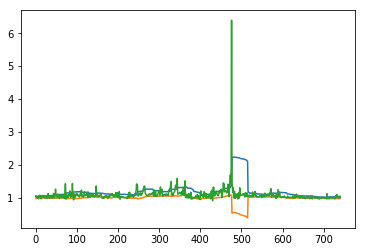

In [23]:
import matplotlib.pyplot as plt
plt.plot(Upp_Bnd[0])
plt.plot(Low_Bnd[0])
plt.plot(price['first_VSI'].values[39:len(price['first_VSI'])])
plt.show()